# US Baby Names Analyse 2018

### Based on MIE1624H: Introduction to Data Science and Analytics
Data Source: https://www.ssa.gov/oact/babynames/limits.html

#### 1. Load file into a DataFrame

In [1]:
import pandas as pd

names2018 = pd.read_csv('yob2018.txt', names=['name', 'sex', 'number'])
names2018

,name,sex,number
0,Emma,F,18688
1,Olivia,F,17921
2,Ava,F,14924
3,Isabella,F,14464
4,Sophia,F,13928
...,...,...,...
32028,Zylas,M,5
32029,Zyran,M,5
32030,Zyrie,M,5
32031,Zyron,M,5


#### 2. Total number of birth in year 2018 by sex

In [2]:
names2018.groupby('sex').number.sum()

sex
F    1686961
M    1800392
Name: number, dtype: int64

#### 3. Insert `prop` column for each group

In [3]:
def add_prop(group):
    # Integer division floors
    number = group.number.astype(float)
    group['prop'] = number / number.sum()
    return group

names2018 = names2018.groupby(['sex']).apply(add_prop)

In [4]:
names2018

,name,sex,number,prop
0,Emma,F,18688,0.011078
1,Olivia,F,17921,0.010623
2,Ava,F,14924,0.008847
3,Isabella,F,14464,0.008574
4,Sophia,F,13928,0.008256
...,...,...,...,...
32028,Zylas,M,5,0.000003
32029,Zyran,M,5,0.000003
32030,Zyrie,M,5,0.000003
32031,Zyron,M,5,0.000003


#### 4. Verify that the `prop` clumn sums to 1 within all the groups

In [5]:
import numpy as np

np.allclose(names2018.groupby(['sex']).prop.sum(), 1)

True

#### 5. Extract a subset of the data with the top 10 names for each sex

In [6]:
def get_top10(group):
    return group.sort_values(by='number', ascending=False)[:10]    

grouped = names2018.groupby(['sex'])
top10 = grouped.apply(get_top10)

In [7]:
top10.index = np.arange(len(top10))

In [8]:
top10

,name,sex,number,prop
0,Emma,F,18688,0.011078
1,Olivia,F,17921,0.010623
2,Ava,F,14924,0.008847
3,Isabella,F,14464,0.008574
4,Sophia,F,13928,0.008256
5,Charlotte,F,12940,0.007671
6,Mia,F,12642,0.007494
7,Amelia,F,12301,0.007292
8,Harper,F,10582,0.006273
9,Evelyn,F,10376,0.006151


#### 6. Aggregate all birth by the first latter from `name` column

In [9]:
# extract first letter from name column
get_first_letter = lambda x: x[0]
first_letters = names2018.name.map(get_first_letter)
first_letters.name = 'first_letter'
table = names2018.pivot_table('number', index=first_letters, columns=['sex'], aggfunc=sum)

In [10]:
table.head()

sex,F,M
first_letter,,
A,296696,180564
B,54402,91509
C,97013,135023
D,40401,96389
E,155779,109837


Normalize the table

In [11]:
table.sum()

sex
F    1686961
M    1800392
dtype: int64

In [12]:
letter_prop = table / table.sum().astype(float)

Plot proportion of boys and girls names starting in each letter

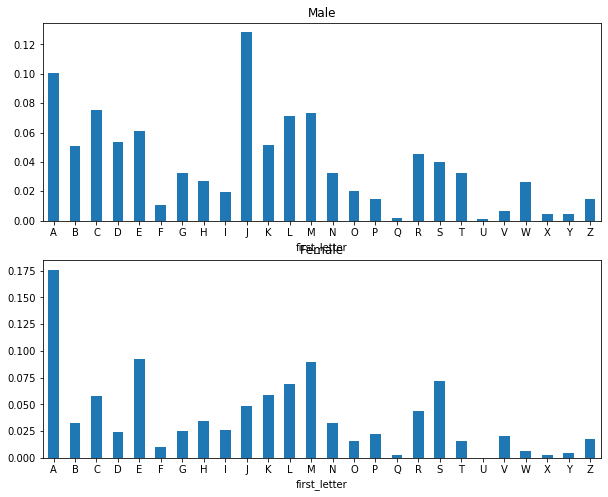

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

#### Todo:
1. Compare the distribution with other year
2. Can we decide the gender by a name?
3. Can we decide the gender by the first letter of a name?
4. Can we decide the age by a name if we know the data from other years?